In [1]:
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
from networkit.graphio import readGraph, Format
from networkit import overview, Glist

from greedy_noninc import do_greedy
from brute_force import do_brute_force
from util import complementary_edges

from matplotlib import pyplot as plt

In [4]:
k = 2


In [5]:
g = readGraph('data/karate.edgelist', fileformat=Format.EdgeListSpaceOne)

In [6]:
cand_edges = complementary_edges(g)

In [7]:
glist = Glist(g)
prev_score = sum(glist.core)
print('prev_score={}'.format(sum(glist.core)))

prev_score=99


In [8]:
%time greedy_edges = do_greedy(g, k, cand_edges)

CPU times: user 116 ms, sys: 4 ms, total: 120 ms
Wall time: 223 ms


In [9]:
def get_score(g, edges):
    for u, v in edges:
        g.addEdge(u, v)    
    score = sum(Glist(g).core)
    for u, v in edges:
        g.removeEdge(u, v)
    return score

In [10]:
get_score(g, greedy_edges)

108

In [11]:
%time optimal_edges = do_brute_force(g, 2, cand_edges)

CPU times: user 7.56 s, sys: 40 ms, total: 7.6 s
Wall time: 9.48 s


In [12]:
get_score(g, optimal_edges)

111

In [13]:
from graph_tool.all import load_graph, sfdp_layout, graph_draw
from graph_tool.topology import kcore_decomposition

In [14]:
g = load_graph('data/karate.gml')

In [15]:
pos = sfdp_layout(g)


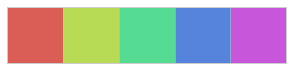

In [16]:
font_size = 24
vertex_size = 40
pal = sns.color_palette("hls", 5)
sns.palplot(pal)

In [17]:
core2color = dict(zip(range(1, 6), pal))

In [18]:
def get_color(core):
    color = g.new_vertex_property('vector<double>')
    for v in g.vertices():
        color[v] = core2color[core[v]] + (1, )  # remember the opacity
    return color

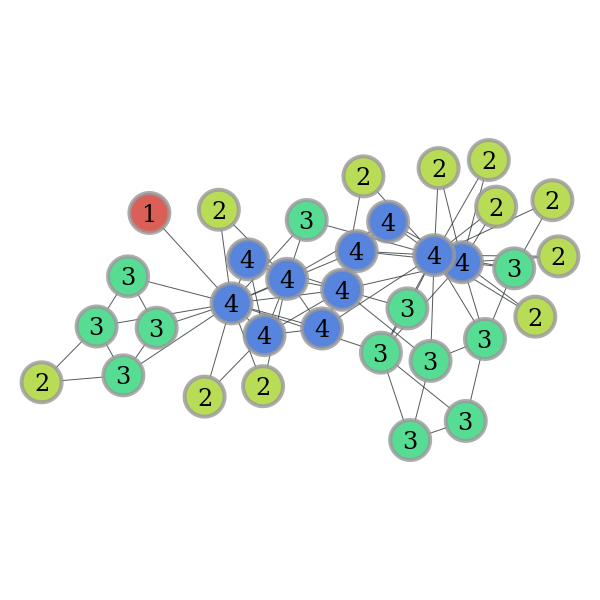

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fb1beb1f940, at 0x7fb1e3505dd8>

In [23]:
core = kcore_decomposition(g)
color = get_color(core)
graph_draw(g, pos, vertex_fill_color=color, vertex_text=core,
           edge_pen_width=1,
           vertex_font_size=font_size,
           vertex_size=vertex_size,
           output='figs/karate_original.png')

In [20]:
def draw_improvement(g, edges, output_path):
    g.add_edge_list(edges)
    core = kcore_decomposition(g)
    edge_width = g.new_edge_property('int')
    edge_width.set_value(1)
    for u, v in edges:
        edge_width[g.edge(u, v)] = 10
    graph_draw(g, pos, vertex_fill_color=get_color(core), vertex_text=core, edge_pen_width=edge_width,
               vertex_font_size=font_size,
               vertex_size=vertex_size,
               output=output_path)
    for e in edges:
        g.remove_edge(g.edge(*e))    

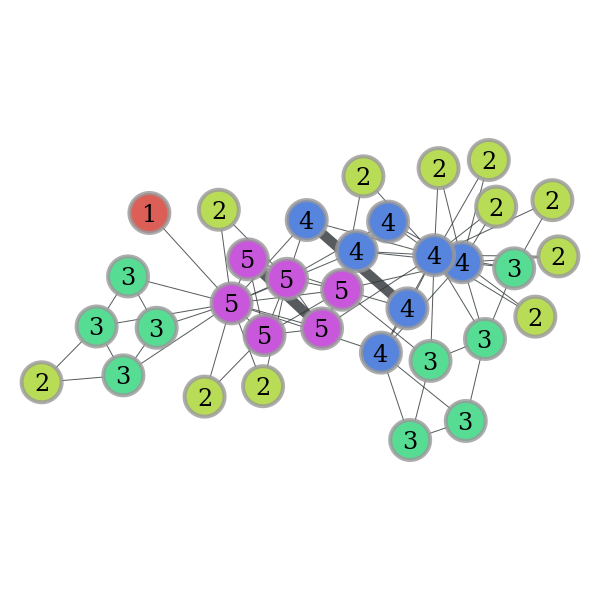

In [21]:
draw_improvement(g, greedy_edges, output_path='figs/karate_greedy_k2.png')

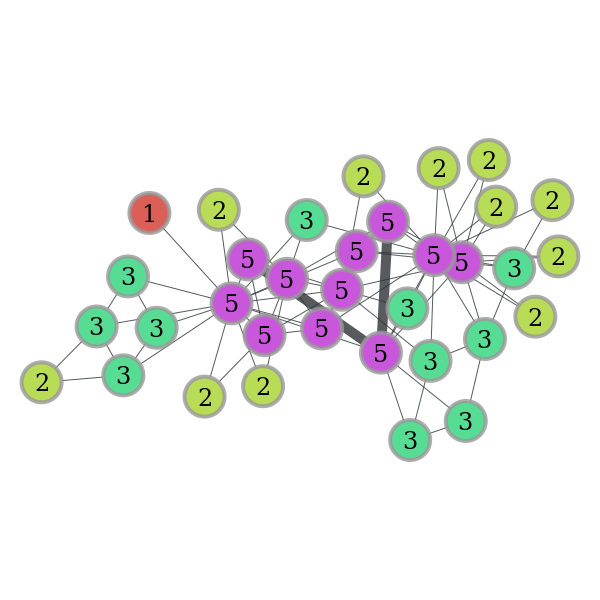

In [22]:
draw_improvement(g, optimal_edges, output_path='figs/karate_optimal_k2.png')